# Jonathan Halverson
# Tuesday, January 23, 2017
# NYC Stop and Frisk

Data obtained from http://www.nyc.gov/html/nypd/html/analysis_and_planning/stop_question_and_frisk_report.shtml

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('2015_sqf_csv.csv', header=0, parse_dates=['datestop'])

In [3]:
df.head(3).transpose()

,0,1,2
year,2015,2015,2015
pct,61,22,20
ser_num,18,5,36
datestop,1012015,1152015,1292015
timestop,315,1747,1745
recstat,1,A,1
inout,O,O,O
trhsloc,P,P,P
perobs,2,1,1
crimsusp,FELONY,FELONY,MISD


In [4]:
df[['age', 'weight', 'ht_feet', 'ht_inch', 'perobs']].describe()

,age,weight,ht_feet,ht_inch,perobs
count,22563.000000,22563.000000,22563.000000,22563.000000,22563.000000
mean,28.960555,171.360768,5.214333,6.259496,2.639144
std,34.621549,45.147912,0.423130,3.496789,7.120538
min,0.000000,1.000000,3.000000,0.000000,0.000000
25%,19.000000,150.000000,5.000000,4.000000,1.000000
50%,24.000000,170.000000,5.000000,7.000000,1.000000
75%,33.000000,185.000000,5.000000,9.000000,2.000000
max,999.000000,999.000000,7.000000,11.000000,535.000000


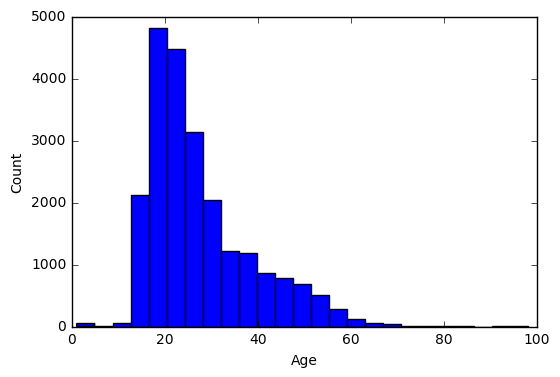

In [5]:
plt.hist(df[(df.age > 0) & (df.age < 99)].age, bins=25)
plt.xlabel('Age')
plt.ylabel('Count')

In [6]:
df[(df.age > 0) & (df.age < 99)].age.mean()

27.487440990469405

In [7]:
df['sex'].unique()

array(['M', 'F', 'Z'], dtype=object)

### Men vs. Women

In [8]:
gender = df['sex'].value_counts()
gender

M    20853
F     1515
Z      195
Name: sex, dtype: int64

In [9]:
gender['M'] / float(gender['F'])

13.764356435643565

### Race

In [10]:
s = df['race'].value_counts()
s

B    11950
Q     5090
W     2514
P     1409
A     1103
Z      298
U      122
I       77
Name: race, dtype: int64

In [11]:
race_labels = pd.read_csv('2015_sqf_file_spec_page2.csv', skiprows=4)
race_labels = race_labels[222:230]
race_labels

,Field Name,Value,Label
222,NaN,A,ASIAN/PACIFIC ISLANDER
223,NaN,B,BLACK
224,NaN,I,AMERICAN INDIAN/ALASKAN NATIVE
225,NaN,P,BLACK-HISPANIC
226,NaN,Q,WHITE-HISPANIC
227,NaN,W,WHITE
228,NaN,X,UNKNOWN
229,NaN,Z,OTHER


In [12]:
race = pd.merge(race_labels, s.to_frame(), how='inner', left_on='Value', right_index=True)
race

,Field Name,Value,Label,race
222,NaN,A,ASIAN/PACIFIC ISLANDER,1103
223,NaN,B,BLACK,11950
224,NaN,I,AMERICAN INDIAN/ALASKAN NATIVE,77
225,NaN,P,BLACK-HISPANIC,1409
226,NaN,Q,WHITE-HISPANIC,5090
227,NaN,W,WHITE,2514
229,NaN,Z,OTHER,298


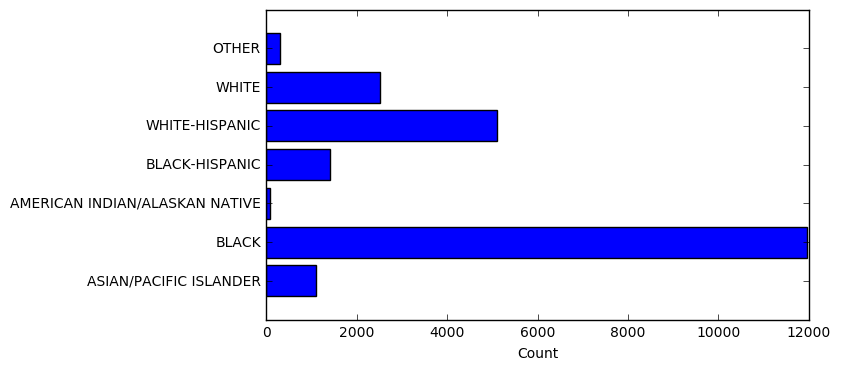

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(7,4))
plt.barh(range(race.shape[0]), race.race, align='center')
plt.yticks(range(race.shape[0]), race.Label)
plt.xlabel('Count')

In [14]:
df.xcoord.values

array(['1000091', ' 994617', ' 991510', ..., ' 989931', ' 995795',
       '1036870'], dtype=object)

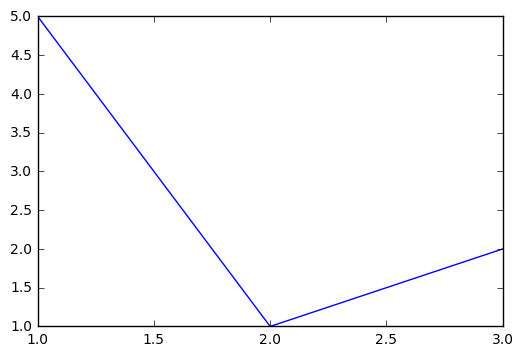

In [15]:
plt.plot([1,2,3],[5,1,2])

In [16]:
df.xcoord.dtype

dtype('O')

In [17]:
df.dtypes

year          int64
pct           int64
ser_num       int64
datestop     object
timestop      int64
recstat      object
inout        object
trhsloc      object
perobs      float64
crimsusp     object
perstop      object
typeofid     object
explnstp     object
othpers      object
arstmade     object
arstoffn     object
sumissue     object
sumoffen     object
compyear      int64
comppct       int64
offunif      object
officrid     object
frisked      object
searched     object
contrabn     object
adtlrept     object
pistol       object
riflshot     object
asltweap     object
knifcuti     object
             ...   
dob          object
age           int64
ht_feet       int64
ht_inch       int64
weight        int64
haircolr     object
eyecolor     object
build        object
othfeatr     object
addrtyp      object
rescode      object
premtype     object
premname     object
addrnum      object
stname       object
stinter      object
crossst      object
aptnum       object
city         object


In [23]:
df.ycoord

0         156314
1         227693
2         225019
3         225019
4         225019
5         225019
6         179416
7         200020
8         201066
9         164979
10        171801
11        182366
12        214690
13        169830
14        232339
15        229289
16        213806
17        218368
18        246760
19        237510
20        192060
21        173740
22        173740
23        173740
24        217852
25        217852
26        164071
27        189164
28        235656
29        216313
          ...   
22533     168921
22534     221867
22535     161674
22536     172217
22537     168170
22538     171957
22539     208885
22540     208885
22541     208885
22542     223272
22543     252382
22544     220905
22545     192105
22546     185128
22547     210932
22548     253744
22549     177355
22550     228899
22551     230172
22552     230172
22553     194465
22554     188293
22555           
22556           
22557     257207
22558     179818
22559     192868
22560     1928

In [27]:
df['xcoord'] = pd.to_numeric(df['xcoord'].fillna(0, inplace=True))
df['ycoord'] = pd.to_numeric(df['ycoord'].fillna(0, inplace=True))

ValueError: Buffer has wrong number of dimensions (expected 1, got 0)

In [ ]:
plt.plot(df.xcoord, df.ycoord, 'r.')

In [ ]:
[(x, y) for x, y in zip(df.xcoord, df.ycoord)]

In [30]:
df['ycoord'].fillna(0, inplace=True)

In [32]:
df.ycoord.isnull()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
22533    False
22534    False
22535    False
22536    False
22537    False
22538    False
22539    False
22540    False
22541    False
22542    False
22543    False
22544    False
22545    False
22546    False
22547    False
22548    False
22549    False
22550    False
22551    False
22552    False
22553    False
22554    False
22555    False
22556    False
22557    False
22558    False
22559    False
22560    False
22561    False
22562    False
Name: ycoord, dtype: bool